In [2]:
%matplotlib inline
import numpy as np
from astropy import units
import matplotlib.pyplot as plt
from astropy.modeling.blackbody import blackbody_lambda
i_units = "kW m-2 sr-1 nm-1" #more practical SI units

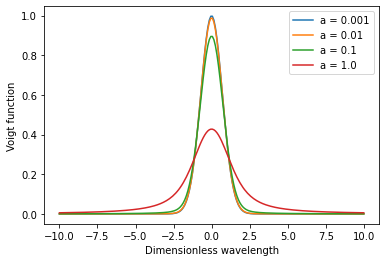

In [3]:
from scipy.special import wofz

def voigt(damping, u):
    """
    Calculates the Voigt function.
    """
    z = (u + 1j * damping)
    return wofz(z).real

u = np.linspace(-10, 10, 200)
a = np.logspace(-3, 0, 4)

fig, ax = plt.subplots()
ax.plot(u, voigt(a[np.newaxis], u[:, np.newaxis]))
legend_elements = ['a = %s' % value for value in a]
ax.legend(legend_elements)
ax.set_ylabel('Voigt function')
ax.set_xlabel('Dimensionless wavelength');

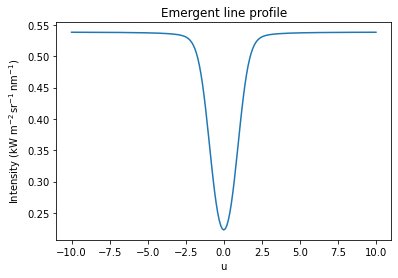

In [5]:
wave = units.Quantity(300, unit = "nm")
#tau0 = 10**(np.linspace(-2,2,9))
tau0 = np.array([1.0])

a = 0.1
u = np.linspace(-10,10,201)

def compute_profile(tau0, a, u, wavelength):
    wave = wavelength[np.newaxis, np.newaxis]
    tau = tau0[np.newaxis]*voigt(a, u[:, np.newaxis])
    tau = tau[..., np.newaxis]
    result = (blackbody_lambda(wave, temp_surface)*np.exp(-tau) + blackbody_lambda(wave, temp_layer)*(1-np.exp(-tau)))
    
    return np.squeeze(result)

temp_layer = 3000*units.K
temp_surface = 4200*units.K

intensity = compute_profile(tau0, a, u, wave)

plt.figure()
plt.plot(u, intensity.to(i_units))
plt.title("Emergent line profile")
plt.xlabel("u")
plt.ylabel(r"Intensity (kW $\mathrm{m^{-2} \, sr^{-1} \, nm^{-1}}$)")
plt.show()